## CIFAR10

* classification (10 classes)
* 60,000 training images (50k training; 10k testing)
* RGB
* 32x32
* airplane (0); car (1); etc


In [1]:
## !pip install torchvision
## !pip install tensorflow-gpu


In [1]:

import torch
import numpy as np
import os 

from torchvision import datasets
from torchvision import transforms


In [2]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [3]:

import torch.optim as optim
import torch.nn as nn


In [4]:
## import tensorflow as tf
## print("GPU Available: ", tf.config.list_physical_devices('GPU'))

In [5]:

data_path = 'data/cifar10data/'

cifar10_training = datasets.CIFAR10(data_path, train=True, download=True)


Files already downloaded and verified


In [6]:

cifar10_test = datasets.CIFAR10(data_path, train= False, download = True)


Files already downloaded and verified


In [7]:
print (cifar10_training)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/cifar10data/
    Split: Train


In [8]:
print (cifar10_test)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data/cifar10data/
    Split: Test


In [9]:
img_train, label = cifar10_training [42]

In [10]:
label

2

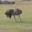

In [11]:
img_train

In [12]:
img_test, label = cifar10_test [2345]

In [13]:
label

1

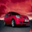

In [14]:
img_test

In [15]:
print ( dir(transforms) )

['AugMix', 'AutoAugment', 'AutoAugmentPolicy', 'CenterCrop', 'ColorJitter', 'Compose', 'ConvertImageDtype', 'ElasticTransform', 'FiveCrop', 'GaussianBlur', 'Grayscale', 'InterpolationMode', 'Lambda', 'LinearTransformation', 'Normalize', 'PILToTensor', 'Pad', 'RandAugment', 'RandomAdjustSharpness', 'RandomAffine', 'RandomApply', 'RandomAutocontrast', 'RandomChoice', 'RandomCrop', 'RandomEqualize', 'RandomErasing', 'RandomGrayscale', 'RandomHorizontalFlip', 'RandomInvert', 'RandomOrder', 'RandomPerspective', 'RandomPosterize', 'RandomResizedCrop', 'RandomRotation', 'RandomSolarize', 'RandomVerticalFlip', 'Resize', 'TenCrop', 'ToPILImage', 'ToTensor', 'TrivialAugmentWide', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_pil_constants', '_presets', 'autoaugment', 'functional', 'functional_pil', 'functional_tensor', 'transforms']


In [16]:

print (img_train)


<PIL.Image.Image image mode=RGB size=32x32 at 0x1FF46627A08>


torch.Size([3, 32, 32])
tensor([[[0.4980, 0.5804, 0.7529,  ..., 0.4392, 0.5647, 0.6000],
         [0.3490, 0.4353, 0.5922,  ..., 0.6314, 0.6510, 0.6392],
         [0.3843, 0.3686, 0.4314,  ..., 0.6784, 0.6627, 0.6784],
         ...,
         [0.6118, 0.5922, 0.5843,  ..., 0.5882, 0.5843, 0.5569],
         [0.6392, 0.6353, 0.6314,  ..., 0.5294, 0.5529, 0.5412],
         [0.6275, 0.6275, 0.6392,  ..., 0.5412, 0.5608, 0.5922]],

        [[0.4941, 0.5647, 0.7098,  ..., 0.4000, 0.5294, 0.5569],
         [0.3529, 0.4314, 0.5529,  ..., 0.5961, 0.6196, 0.6039],
         [0.3686, 0.3686, 0.4275,  ..., 0.6235, 0.6039, 0.6157],
         ...,
         [0.5961, 0.5686, 0.5647,  ..., 0.5647, 0.5804, 0.5608],
         [0.6196, 0.6078, 0.5922,  ..., 0.5137, 0.5373, 0.5255],
         [0.5961, 0.5922, 0.6000,  ..., 0.4745, 0.5137, 0.5294]],

        [[0.5059, 0.5647, 0.6863,  ..., 0.3843, 0.4824, 0.5098],
         [0.3686, 0.4549, 0.5373,  ..., 0.5059, 0.5176, 0.5020],
         [0.3686, 0.3882, 0.4627, 

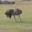

In [17]:
## convert image to tensor

to_tensor = transforms.ToTensor ()

img_train_tr = to_tensor ( img_train )

print ( img_train_tr.shape)
print ( img_train_tr)
img_train

In [18]:
## get images from folder, not online. 
tensor_cifar10_training = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.ToTensor())


In [19]:

img_tr, label = tensor_cifar10_training[23456]


In [20]:

print (img_tr)


tensor([[[0.7412, 0.6314, 0.6627,  ..., 0.5922, 0.8471, 0.9922],
         [0.4588, 0.2392, 0.3020,  ..., 0.1647, 0.6431, 0.9608],
         [0.4392, 0.2000, 0.2667,  ..., 0.1451, 0.5137, 0.8824],
         ...,
         [0.8392, 0.7725, 0.7882,  ..., 0.7255, 0.6196, 0.8118],
         [0.8863, 0.7294, 0.6627,  ..., 0.6275, 0.6196, 0.8353],
         [0.9412, 0.7608, 0.6627,  ..., 0.6588, 0.7216, 0.8902]],

        [[0.7725, 0.6863, 0.7137,  ..., 0.5961, 0.8353, 0.9804],
         [0.5137, 0.3412, 0.4235,  ..., 0.1843, 0.6353, 0.9490],
         [0.5020, 0.3333, 0.4275,  ..., 0.1804, 0.5137, 0.8745],
         ...,
         [0.8235, 0.7490, 0.7725,  ..., 0.7255, 0.6196, 0.8196],
         [0.8706, 0.6980, 0.6431,  ..., 0.6157, 0.6157, 0.8392],
         [0.9333, 0.7451, 0.6549,  ..., 0.6549, 0.7176, 0.8902]],

        [[0.7686, 0.6745, 0.6784,  ..., 0.5882, 0.8353, 0.9843],
         [0.5020, 0.3020, 0.3373,  ..., 0.1843, 0.6431, 0.9569],
         [0.4941, 0.2784, 0.3216,  ..., 0.1882, 0.5333, 0.


## Normalize
* finding averages , averages of all values of green, red, blue


In [21]:
## get images and label them

imgs_list = [img_t for img_t, label in tensor_cifar10_training]


In [22]:
len (imgs_list)

50000

In [23]:
## stacking all images 

all_imgs_tr = torch.stack (imgs_list, dim = 3)

print (all_imgs_tr.shape)
print (all_imgs_tr)


torch.Size([3, 32, 32, 50000])
tensor([[[[0.2314, 0.6039, 1.0000,  ..., 0.1373, 0.7412, 0.8980],
          [0.1686, 0.4941, 0.9922,  ..., 0.1569, 0.7294, 0.9255],
          [0.1961, 0.4118, 0.9922,  ..., 0.1647, 0.7255, 0.9176],
          ...,
          [0.6196, 0.3569, 0.9922,  ..., 0.3882, 0.6863, 0.8510],
          [0.5961, 0.3412, 0.9922,  ..., 0.3098, 0.6745, 0.8667],
          [0.5804, 0.3098, 0.9922,  ..., 0.3490, 0.6627, 0.8706]],

         [[0.0627, 0.5490, 1.0000,  ..., 0.2235, 0.7608, 0.8706],
          [0.0000, 0.5686, 1.0000,  ..., 0.1725, 0.7490, 0.9373],
          [0.0706, 0.4902, 1.0000,  ..., 0.1961, 0.7451, 0.9137],
          ...,
          [0.4824, 0.3765, 1.0000,  ..., 0.6118, 0.6784, 0.8745],
          [0.4667, 0.3020, 1.0000,  ..., 0.5529, 0.6706, 0.8902],
          [0.4784, 0.2784, 1.0000,  ..., 0.4549, 0.6549, 0.8235]],

         [[0.0980, 0.5490, 1.0000,  ..., 0.3843, 0.8157, 0.8353],
          [0.0627, 0.5451, 0.9961,  ..., 0.2510, 0.8039, 0.9176],
          [

In [24]:
## view1 = all_imgs_tr.view (3, -1, 50000) => torch.Size([3, 1024, 50000]) => 3 color , 32x32 = 1024 , 50,000 images. now all images into matrix (1024x50000).

## view1 = all_imgs_tr.view (3, -1) => torch.Size([3, 51200000]) => 3 color , 1024x50,000. now all images into matrix (1x51'200'000).


view1 = all_imgs_tr.view (3, -1)

print (view1.shape)


torch.Size([3, 51200000])


In [25]:
## take the mean of them by each color

view1_mean = view1.mean(dim=1)

print (view1_mean)


tensor([0.4914, 0.4822, 0.4465])


In [26]:
## finding standard deviation of means of colors

view1_std = view1.std(dim = 1)

print (view1_std)


tensor([0.2470, 0.2435, 0.2616])


In [27]:
## Now, use mean values (standard deviation) to replace values that in images
## pixel = ( pixel - mean ) / standard_dev 


transformed_cifar10_train = datasets.CIFAR10 (data_path, train = True, download = False,
                                                 transform = transforms.Compose (
                                                     [
                                                         transforms.ToTensor (),
                                                         transforms.Normalize(view1_mean, view1_std)
                                                         
                                                     ]
                                                 )
                                             )

transformed_cifar10_test = datasets.CIFAR10 (data_path, train = False, download = False,
                                                 transform = transforms.Compose (
                                                     [
                                                         transforms.ToTensor (),
                                                         transforms.Normalize(view1_mean, view1_std)
                                                         
                                                     ]
                                                 )
                                             )


In [28]:

transformed_cifar10_test.data.shape


(10000, 32, 32, 3)

* 32 x 32 x 3 = 3072

## Build Dataset

In [29]:
## 
label_map = { 0:0, 2:1 }


In [30]:
## labeling

cifar10_final_train = [ (img, label_map [label]) for img, label in transformed_cifar10_train if label in [0, 2] ] 
## choose only labeled 0 and 2, not all



In [31]:

cifar10_final_test = [ (img, label_map [label]) for img, label in transformed_cifar10_test if label in [0, 2] ]



## Dataloader


In [32]:
batch_size = 32

In [33]:

train_DataLoader = torch.utils.data.DataLoader (cifar10_final_train, batch_size = batch_size, shuffle = True)



## Architectures


* homework: we do it by object oriented way

def mlp ()
    init
    


In [34]:
## you need to conver these to object oriented format

model_mlp = nn.Sequential(
        nn.Linear (3072, 512), ## neurons less than input, like that funnel
        nn.ReLU (), ## Tanh(), Sigmoid(), etc.
        nn.Linear (512, 2), ## 2 vectors = 2 classification
        nn.Softmax (dim = 1)

)

## 10 vectors we wanted
## labeled 2 -> [0,0,1,0,0,0,0,0,0,0]
## labeled 7 -> [0,0,0,0,0,0,0,1,0,0]

## real result will be looks like
## labeled 7 -> [0.2,0.5,0,0.4,0,0,0,0.9,0,0]

## softmax can helps to solve this issue.

In [35]:
## Deep Learning 

model_3DL = nn.Sequential(
        nn.Linear (3072, 1024), 
        nn.ReLU (),
        nn.Linear (1024, 512), 
        nn.ReLU (),
        nn.Linear (512, 128), 
        nn.ReLU (),
        nn.Linear (128, 2), 
        nn.LogSoftmax (dim = 1)

)



In [36]:
## in classification problem, use CrossEntropyLoss function for loss function

loss_fn = nn.CrossEntropyLoss  ( )


In [37]:

model_fn = model_3DL


## Training Process

In [38]:

learning_rate = 0.001

n_epochs = 10

optimizer = optim.Adam( model_fn.parameters(), lr = learning_rate )



In [39]:

for epoch in range (n_epochs):
    for imgs, labels in train_DataLoader:
        ## print (labels)
        ## resize img
        imgs_resized = imgs.view(imgs.shape[0], -1) ## -1 ???
        preds = model_fn(imgs_resized) ## will return classification label
        loss = loss_fn ( preds, labels )
        
        optimizer.zero_grad ()
        loss.backward () ## compute new gratiante 
        optimizer.step ()
    print (loss)
 
 ## tensor([6, 2, 3, 2, 8, 5, 6, 4, 7, 6, 7, 5, 9, 9, 5, 5, 5, 1, 3, 2, 4, 3, 0, 8,
 ##        2, 4, 6, 4, 0, 5, 7, 9])


tensor(0.3522, grad_fn=<NllLossBackward0>)
tensor(0.3876, grad_fn=<NllLossBackward0>)
tensor(0.2959, grad_fn=<NllLossBackward0>)
tensor(0.4686, grad_fn=<NllLossBackward0>)
tensor(0.3507, grad_fn=<NllLossBackward0>)
tensor(0.1803, grad_fn=<NllLossBackward0>)
tensor(0.2269, grad_fn=<NllLossBackward0>)
tensor(0.1004, grad_fn=<NllLossBackward0>)
tensor(0.9968, grad_fn=<NllLossBackward0>)
tensor(0.0906, grad_fn=<NllLossBackward0>)



## Test model on the test set


In [60]:
len (cifar10_final_test)

2000

In [61]:

test_DataLoader = torch.utils.data.DataLoader (cifar10_final_test, batch_size = 2000, shuffle = False )


In [62]:

with torch.no_grad():
    for imgs, labels in test_DataLoader:
        batch_size = imgs.shape [0]
        outputs = model_fn ( imgs.view(batch_size, -1) )
        val, indeces = torch.max (outputs, dim = 1)
        preds = indeces 
        metrics = (preds == labels).sum()
        
        total = imgs.shape[1]
        
result = metrics / total


In [63]:
result

tensor(568.6667)

In [64]:

def print_metrics_function (y_test, y_pred):
    print ('Accuracy: %.2f' % accuracy_score (y_test, y_pred))
    confmat = confusion_matrix (y_true = y_test, y_pred = y_pred)
    print ("Confusion Matrix:")
    print (confmat)
    
    print ('Precision: %.3f' % precision_score (y_true = y_test, y_pred = y_pred, average = 'weighted'))
    print ('Recall: %.3f' % recall_score (y_true = y_test, y_pred = y_pred, average = 'weighted'))
    print ('F1-measure: %.3f' % f1_score (y_true = y_test, y_pred = y_pred, average = 'weighted'))
    

In [65]:

with torch.no_grad():
    for imgs, labels in test_DataLoader:
        batch_size = imgs.shape [0]
        outputs = model_fn ( imgs.view(batch_size, -1) )
        val, indeces = torch.max (outputs, dim = 1)
        preds = indeces 
        print_metrics_function (labels, preds)
        
        

Accuracy: 0.85
Confusion Matrix:
[[878 122]
 [172 828]]
Precision: 0.854
Recall: 0.853
F1-measure: 0.853
